## Water Potability 

https://www.kaggle.com/datasets/adityakadiwal/water-potability

Access to safe drinking-water is essential to health, a basic human right and a component of effective policy for health protection. This is important as a health and development issue at a national, regional and local level. In some regions, it has been shown that investments in water supply and sanitation can yield a net economic benefit, since the reductions in adverse health effects and health care costs outweigh the costs of undertaking the interventions.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.simplefilter("ignore")

In [5]:
water_df = pd.read_csv("csv/water_potability.csv")

In [6]:
water_df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [7]:
water_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [8]:
water_df.shape

(3276, 10)

In [9]:
water_df. describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


#### Check Missing Values

In [11]:
water_df.isna().any()

ph                  True
Hardness           False
Solids             False
Chloramines        False
Sulfate             True
Conductivity       False
Organic_carbon     False
Trihalomethanes     True
Turbidity          False
Potability         False
dtype: bool

- we can see here, if there are missing values ​​in 3 columns (Ph, sulfate,Trihalomethanes)

In [13]:
missing_percentage = water_df.isna().mean()*100

In [14]:
missing_percentage

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64

### Exploratory Data Analysis

In [16]:
water_df.columns

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

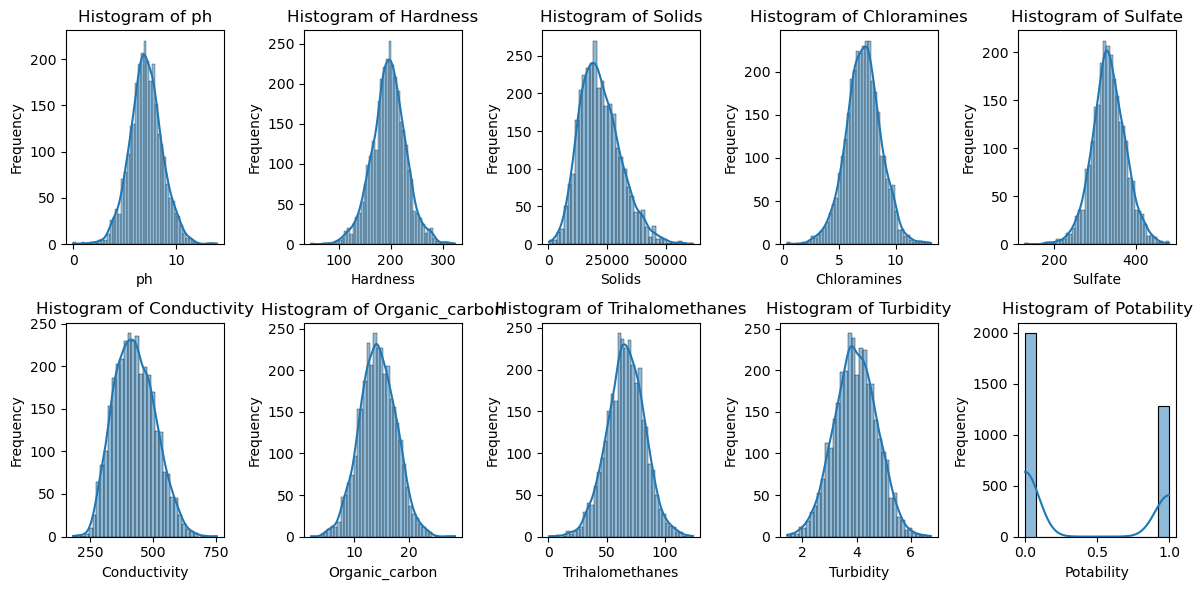

In [17]:
def plot_numeric_columns(water_df):
    # Mengidentifikasi kolom-kolom numerik
    numeric_cols = water_df.select_dtypes(include=['number']).columns

    # Mengecek apakah ada kolom numerik
    if len(numeric_cols) == 0:
        print("Tidak ada kolom numerik dalam DataFrame.")
        return
    
    # Menghitung jumlah baris yang diperlukan untuk subplot
    n_cols = 5
    n_rows = -(-len(numeric_cols) // n_cols)  # Pembulatan ke atas
    
    # Membuat subplot
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 3 * n_rows))
    axes = axes.flatten()  # Flatten the axes array for easy iteration
    
    # Membuat plot untuk setiap kolom numerik
    for i, col in enumerate(numeric_cols):
        sns.histplot(water_df[col], kde=True, ax=axes[i])
        axes[i].set_title(f'Histogram of {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
    
    # Menghapus subplot kosong
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

# Memanggil fungsi untuk membuat plot
plot_numeric_columns(water_df)

Potability
0    1998
1    1278
Name: count, dtype: int64


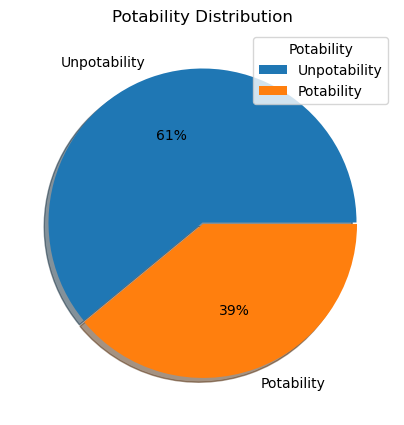

In [18]:
potability = water_df['Potability'].value_counts()
print(potability)

# create pie chart
plt.figure(figsize=(5, 5))
plt.pie(potability, labels=["Unpotability", "Potability"], explode=[0, 0.01], autopct='%.f%%', shadow=True)
plt.legend(title="Potability")
plt.title("Potability Distribution")
plt.show()


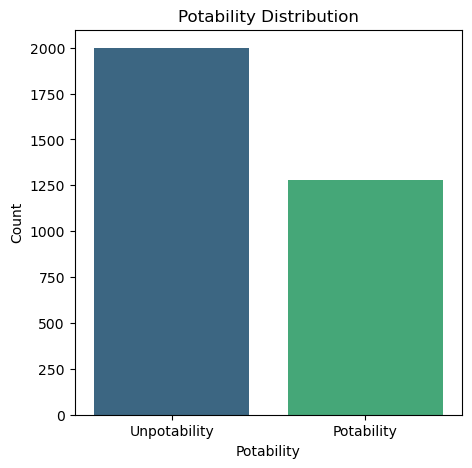

In [19]:
# Membuat count plot
plt.figure(figsize=(5, 5))
sns.countplot(x='Potability', data=water_df, palette="viridis")
plt.xlabel("Potability")
plt.ylabel("Count")
plt.title("Potability Distribution")
plt.xticks(ticks=[0, 1], labels=["Unpotability", "Potability"])
plt.show()

In [20]:
water_df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.082096,-0.089288,-0.034350,0.018203,0.018614,0.043503,0.003354,-0.039057,-0.003556
Hardness,0.082096,1.000000,-0.046899,-0.030054,-0.106923,-0.023915,0.003610,-0.013013,-0.014449,-0.013837
Solids,-0.089288,-0.046899,1.000000,-0.070148,-0.171804,0.013831,0.010242,-0.009143,0.019546,0.033743
Chloramines,-0.034350,-0.030054,-0.070148,1.000000,0.027244,-0.020486,-0.012653,0.017084,0.002363,0.023779
Sulfate,0.018203,-0.106923,-0.171804,0.027244,1.000000,-0.016121,0.030831,-0.030274,-0.011187,-0.023577
Conductivity,0.018614,-0.023915,0.013831,-0.020486,-0.016121,1.000000,0.020966,0.001285,0.005798,-0.008128
Organic_carbon,0.043503,0.003610,0.010242,-0.012653,0.030831,0.020966,1.000000,-0.013274,-0.027308,-0.030001
Trihalomethanes,0.003354,-0.013013,-0.009143,0.017084,-0.030274,0.001285,-0.013274,1.000000,-0.022145,0.007130
Turbidity,-0.039057,-0.014449,0.019546,0.002363,-0.011187,0.005798,-0.027308,-0.022145,1.000000,0.001581
Potability,-0.003556,-0.013837,0.033743,0.023779,-0.023577,-0.008128,-0.030001,0.007130,0.001581,1.000000


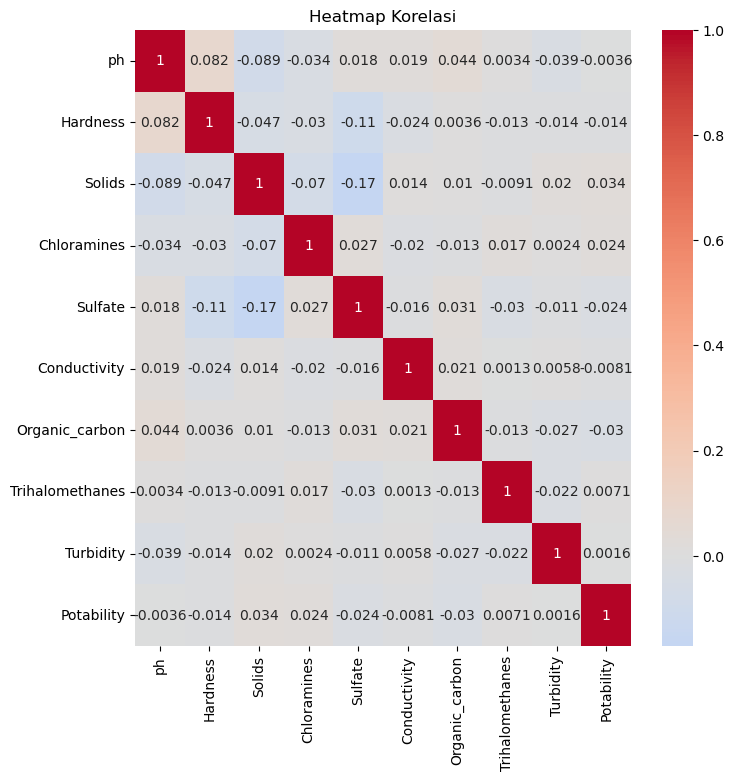

In [21]:
correlation_matrix = water_df.corr()

# create heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap Korelasi')
plt.show()

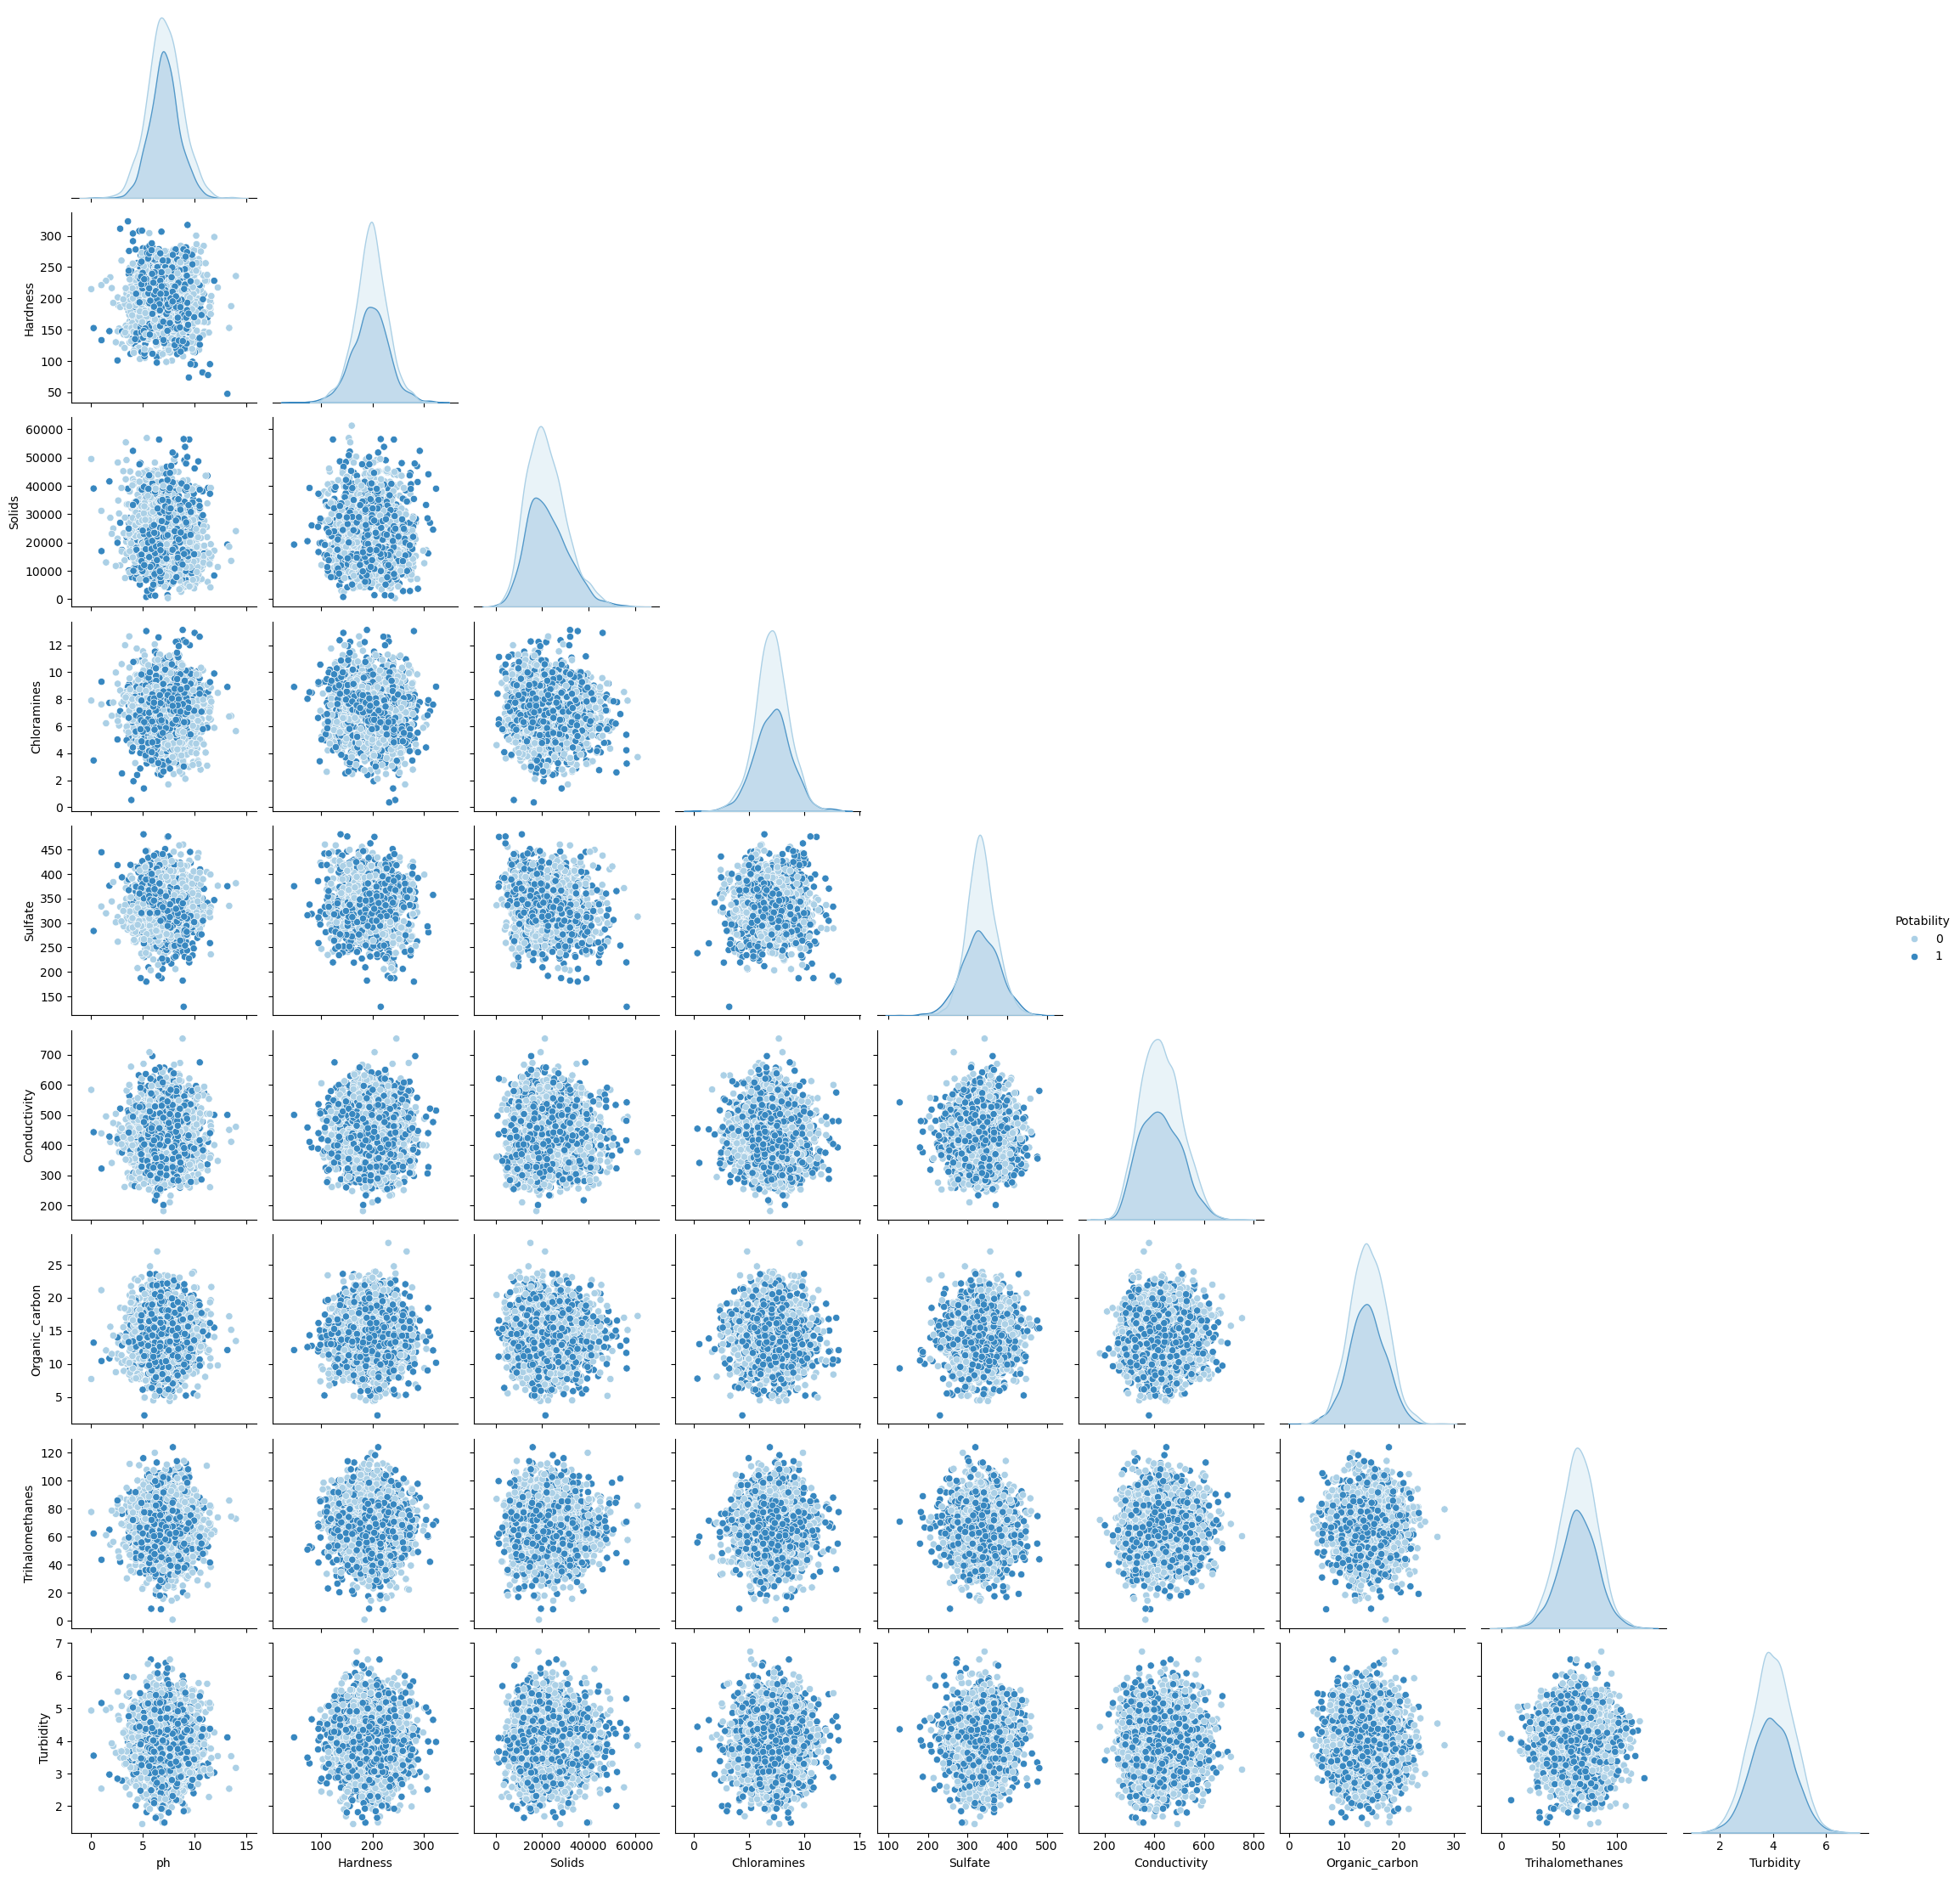

In [22]:
sns.pairplot(water_df, hue='Potability', corner=True, palette='Blues')
plt.show()

### Handle Missing Values

because of large number of missing values, we replace them with median for each columns

In [25]:
print("For Potability=1")
water_df[water_df.Potability==1][['ph', 'Sulfate', 'Trihalomethanes']].median()

For Potability=1


ph                   7.036752
Sulfate            331.838167
Trihalomethanes     66.678214
dtype: float64

In [26]:
print("For Potability=0")
water_df[water_df.Potability==0][['ph', 'Sulfate', 'Trihalomethanes']].median()

For Potability=0


ph                   7.035456
Sulfate            333.389426
Trihalomethanes     66.542198
dtype: float64

for both potability = 1 and potability = 0, medians are approximately equall.

we will replace the  with their medians

In [28]:
water_df['ph'] = water_df['ph'].fillna(value=water_df['ph'].median())

water_df['Sulfate'] = water_df['Sulfate'].fillna(value=water_df['Sulfate'].median())

water_df['Trihalomethanes'] = water_df['Trihalomethanes'].fillna(value=water_df['Trihalomethanes'].median())


In [29]:
water_df.isna().any()

ph                 False
Hardness           False
Solids             False
Chloramines        False
Sulfate            False
Conductivity       False
Organic_carbon     False
Trihalomethanes    False
Turbidity          False
Potability         False
dtype: bool

we can see, the all missing values  handled

### Data Preparation

we will use potability as target and using minmaxscaller to map values in range (0,1) normalization

In [33]:
#define X,y

X = water_df.drop(columns="Potability")
y = water_df.Potability

In [34]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

In [35]:
scaler = MinMaxScaler(feature_range=(0, 1))
water_df = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
water_df.describe().loc[['min', 'mean', 'std', 'max']].T.style.background_gradient(cmap='inferno',axis=1)

,min,mean,std,max
ph,0.000000,0.505300,0.105003,1.000000
Hardness,0.000000,0.540231,0.119263,1.000000
Solids,0.000000,0.356173,0.143968,1.000000
Chloramines,0.000000,0.529963,0.123921,1.000000
Sulfate,0.000000,0.581223,0.102672,1.000000
Conductivity,0.000000,0.427940,0.141336,1.000000
Organic_carbon,0.000000,0.463026,0.126750,1.000000
Trihalomethanes,0.000000,0.532763,0.127939,1.000000
Turbidity,0.000000,0.475853,0.147548,1.000000


### Modelling

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

In [38]:
# A function to plot "Confusion Matrix" and "Classification Report"
def plot_result(y_pred) :
    fig, ax = plt.subplots(1, 2, figsize=(15, 4))
    fig.tight_layout()
    #AX left - Confusion Matrix
    cm = metrics.confusion_matrix(y_test, y_pred)
    ax[0]=sns.heatmap(cm, cmap='Greens', annot=True, fmt='', linewidths=0.5, ax=ax[0])
    ax[0].set_xlabel('Predicted labels', fontsize=18)
    ax[0].set_ylabel('True labels', fontsize=18)
    ax[0].set_title('Confusion Matrix', fontsize=25)
    ax[0].xaxis.set_ticklabels(['0', '1'])
    ax[0].yaxis.set_ticklabels(['0', '1'])
    #
    # AX Right - Classification Report
    cr = pd.DataFrame(metrics.classification_report(y_test, y_pred, digits=3, output_dict=True)).T
    cr.drop(columns='support', inplace=True)
    ax[1] = sns.heatmap(cr, cmap='Greens', annot=True, fmt='0.3f', linewidths=0.5, ax=ax[1])
    ax[1].xaxis.tick_top()
    ax[1].set_title('Classification Report', fontsize=25)
    plt.show()

In [39]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'C' : [0.001, 1, 1000],
    'class_weight' : ['balanced', None],
    'solver' : ['liblinear', 'sag'],
    'penalty' : ['l2'],
    'n_jobs' : [-1],
}

lr = LogisticRegression()
lr_cv = GridSearchCV(estimator=lr, param_grid=parameters, cv=20).fit(X_train, y_train)

print(('Tuned hyper parameters :\n{}'.format(lr_cv.best_params_), 'green'))

("Tuned hyper parameters :\n{'C': 0.001, 'class_weight': None, 'n_jobs': -1, 'penalty': 'l2', 'solver': 'liblinear'}", 'green')


#### Logistic Regression 

In [41]:
lr = LogisticRegression(**lr_cv.best_params_).fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

lr_score = round(lr.score(X_test, y_test), 3)
print(('LogisticRegression Score : {}'.format(lr_score), 'green'))

('LogisticRegression Score : 0.627', 'green')


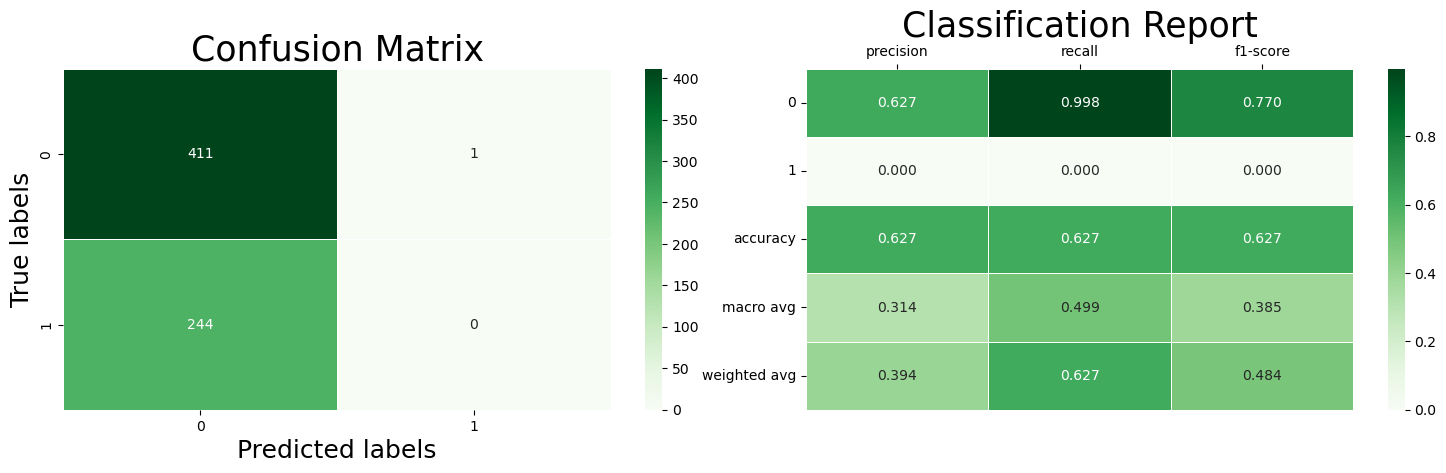

In [42]:
plot_result(y_pred_lr)

#### Random Forest Regression 

In [44]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'n_estimators' : [1000],
    'criterion' : ['log_loss'],
    'max_features' : ['sqrt'],
    'n_jobs' : [-1]
}

rf = RandomForestClassifier()
rf_cv = GridSearchCV(estimator=rf, param_grid=parameters, cv=20).fit(X_train, y_train)
print('Tuned hyper parameters :\n{}'.format(rf_cv.best_params_))

Tuned hyper parameters :
{'criterion': 'log_loss', 'max_features': 'sqrt', 'n_estimators': 1000, 'n_jobs': -1}


In [45]:
rf = RandomForestClassifier(**rf_cv.best_params_).fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

rf_score = round(rf.score(X_test, y_test), 3)
print('RandomForestClassifier Score : {}'.format(rf_score))

RandomForestClassifier Score : 0.689


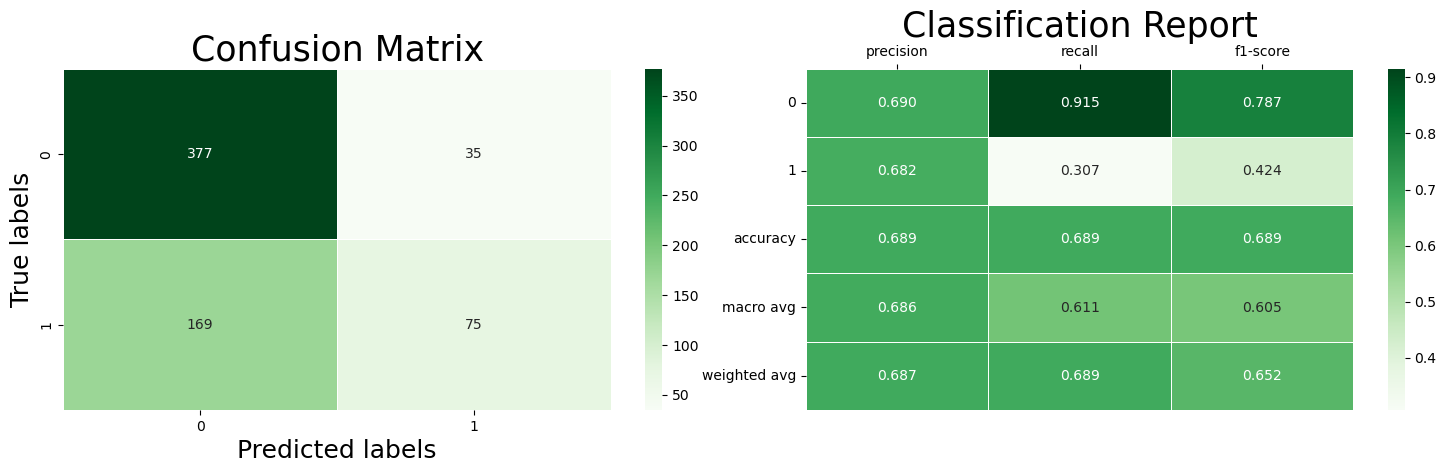

In [46]:
plot_result(y_pred_rf)

### MLPClassifier

In [48]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'hidden_layer_sizes' : [500],
    'activation' : ['logistic'],
    'alpha' : [0.0001],
    'batch_size' : [200],
    
}

mlp = MLPClassifier()
mlp_cv = GridSearchCV(estimator=mlp, param_grid=parameters, cv=20).fit(X_train, y_train)

print('Tuned hyper parameters :\n{}'.format(mlp_cv.best_params_))

Tuned hyper parameters :
{'activation': 'logistic', 'alpha': 0.0001, 'batch_size': 200, 'hidden_layer_sizes': 500}


In [49]:
mlp = MLPClassifier(**mlp_cv.best_params_).fit(X_train, y_train)

y_pred_mlp = mlp.predict(X_test)

mlp_score = round(mlp.score(X_test, y_test), 3)
print('MLPClassifier Score : {}'.format(mlp_score))

MLPClassifier Score : 0.631


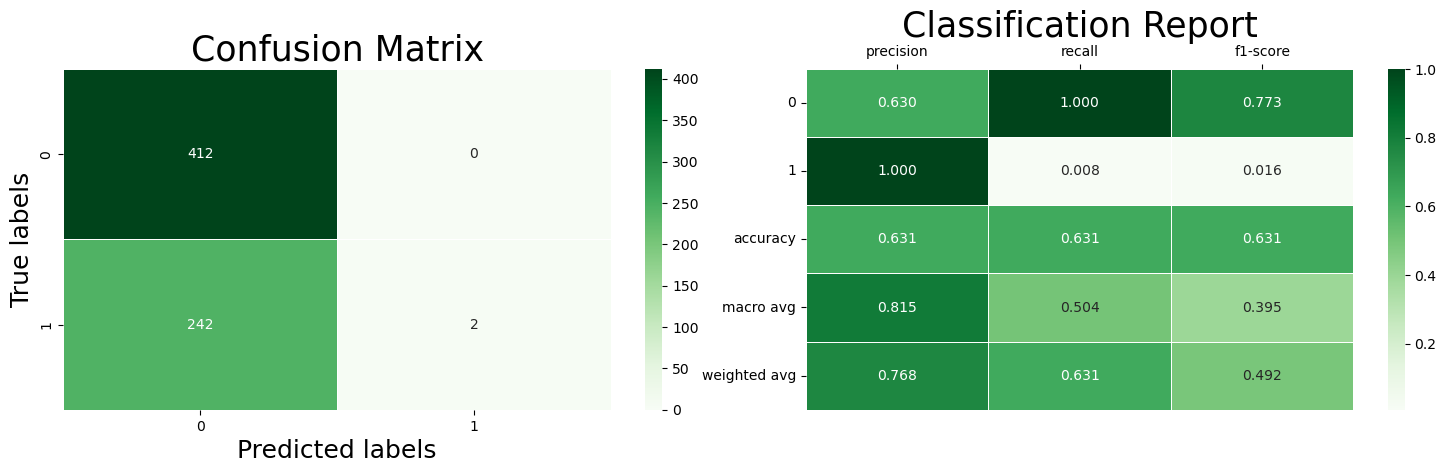

In [50]:
plot_result(y_pred_mlp)

### KNN Classifier

In [52]:
# a dictionary to define parameters to test in algorithm
parameters = {
    'n_neighbors' : list(np.arange(3, 50, 2)),
    'weights': ['uniform', 'distance'],
    'p' : [1, 2, 3, 4]
}

knn = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator=knn, cv=10, param_grid=parameters).fit(X_train, y_train)

print('Tuned hyper parameters :\n{}'.format(knn_cv.best_params_))

Tuned hyper parameters :
{'n_neighbors': 35, 'p': 1, 'weights': 'distance'}


In [53]:
knn = KNeighborsClassifier(**knn_cv.best_params_).fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

knn_score = round(knn.score(X_test, y_test), 3)
print('KNeighborsClassifier Score : {}'.format(knn_score))

KNeighborsClassifier Score : 0.616


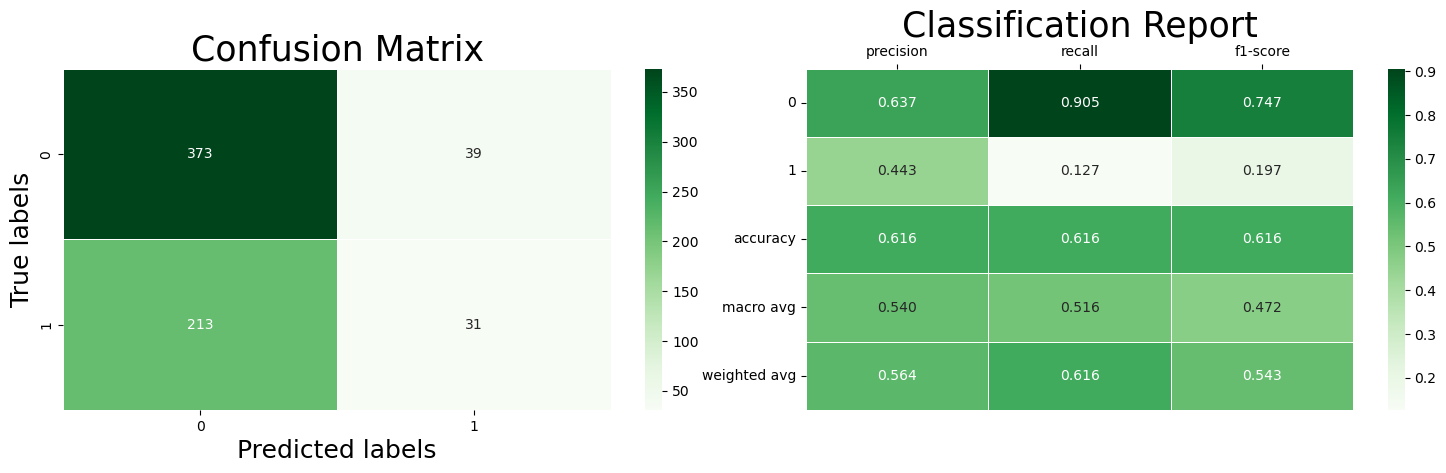

In [54]:
plot_result(y_pred_knn)

### Result

In [56]:
result = pd.DataFrame({
    'Algorithm' : ['RandomForestClassifier', 'LogisticRegression', 'KNeighborsClassifier', 'MLPClassifier'],
    'Score' : [rf_score, lr_score,  knn_score, mlp_score]
})


result.style.background_gradient()

,Algorithm,Score
0,RandomForestClassifier,0.689000
1,LogisticRegression,0.627000
2,KNeighborsClassifier,0.616000
3,MLPClassifier,0.631000


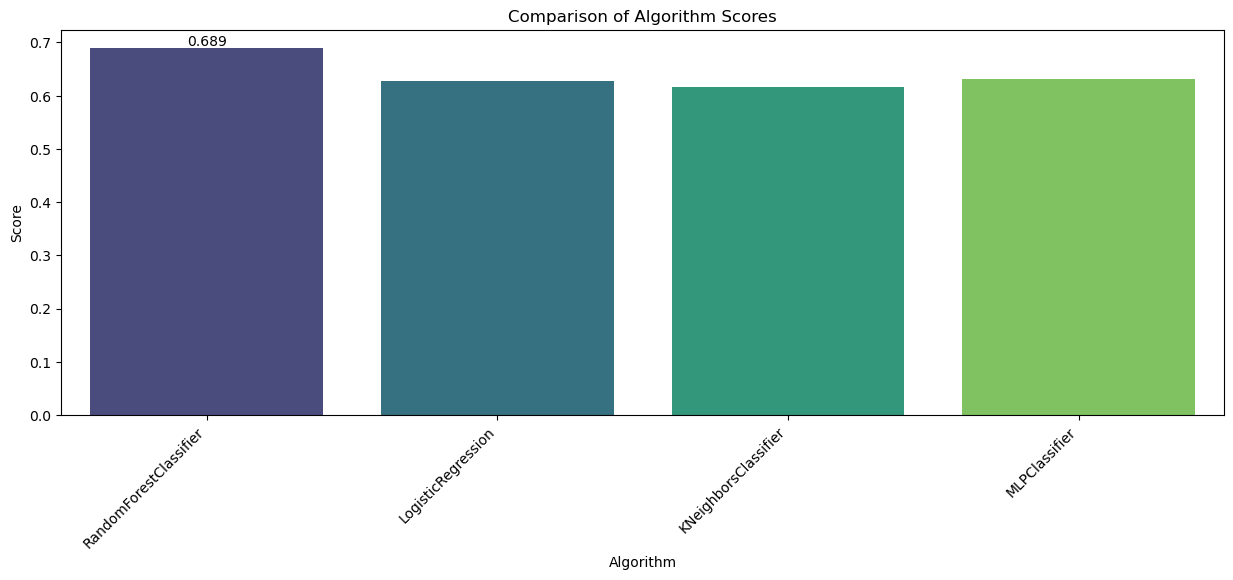

In [57]:
# create plot
fig, ax = plt.subplots(1, 1, figsize=(15, 5))

sns.barplot(x='Algorithm', y='Score', data=result, palette='viridis', ax=ax)
ax.bar_label(ax.containers[0], fmt='%.3f')
ax.set_xticklabels(result['Algorithm'], rotation=45, ha='right')

ax.set_title('Comparison of Algorithm Scores')

plt.show()

### as we can see, the best algorithms is RandomForestClassifier with score 0.692

#### FINISHED ~